In [61]:
import camelot as cm

In [63]:
! ls

Extracting Table from PDF - UN HDI Report.ipynb
News Summarization with Gensim.ipynb
PDF.pptx
arch_auto_email.pptx
hn_news_scraper_no_cred.py
image_conversion.py
india_factsheet_economic_n_hdi.pdf
table_from_pdf.csv
table_from_pdf.xlsx
ted_talk_downloader.py
~$PDF.pptx


In [ ]:
#input_pdf = cm.read_pdf("https://www.undp.org/content/dam/india/docs/india_factsheet_economic_n_hdi.pdf",flavor='stream')

In [ ]:
#"stream", "lattice"

In [64]:
input_pdf = cm.read_pdf("india_factsheet_economic_n_hdi.pdf",flavor='lattice',pages='1,2')

In [65]:
input_pdf

<TableList n=4>

In [66]:
for n in input_pdf:
    print(n)

<Table shape=(4, 3)>
<Table shape=(15, 3)>
<Table shape=(14, 4)>
<Table shape=(13, 3)>


In [67]:
input_pdf[2].df

,0,1,2,3
0,Human Development Indicators,,2000,2011
1,13,Human Development Index Value (HDI),0.461,0.547
2,14,HDI Rank (out of 187),,134
3,15,Inequality Adjusted Human Development Index Value,,0.392
4,16,Loss in HDI due to Inequalities (%),,28.7
5,,,2001,2011
6,17,Gender Inequality Index (GII),0.5531,0.617
7,18,GII Rank (out of 146),,129
8,,,1996,2006
9,19,Gender Empowerment Measure (GEM),0.416,0.497


In [68]:
df = input_pdf[2].df.loc[11:14,1:3]

In [69]:
df

,1,2,3
11,Literacy Rate (%),64.8,74.04
12,Male Literacy Rate (%),75.3,82.14
13,Female Literacy Rate (%),53.7,65.46


In [70]:
df = df.reset_index(drop = True)

In [71]:
df

,1,2,3
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [72]:
df.columns = ["KPI","2001","2011"]

In [73]:
df

,KPI,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [74]:
df.loc[:,["2001","2011"]] = df.loc[:,["2001","2011"]].astype(float)

In [75]:
df

,KPI,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [76]:
df.to_csv("packt_output.csv")

In [77]:
! ls

Extracting Table from PDF - UN HDI Report.ipynb
News Summarization with Gensim.ipynb
PDF.pptx
arch_auto_email.pptx
hn_news_scraper_no_cred.py
image_conversion.py
india_factsheet_economic_n_hdi.pdf
packt_output.csv
table_from_pdf.csv
table_from_pdf.xlsx
ted_talk_downloader.py
~$PDF.pptx


In [78]:
df.to_excel("packt_output_excel.xlsx")

In [79]:
!ls

Extracting Table from PDF - UN HDI Report.ipynb
News Summarization with Gensim.ipynb
PDF.pptx
arch_auto_email.pptx
hn_news_scraper_no_cred.py
image_conversion.py
india_factsheet_economic_n_hdi.pdf
packt_output.csv
packt_output_excel.xlsx
table_from_pdf.csv
table_from_pdf.xlsx
ted_talk_downloader.py
~$PDF.pptx


In [80]:
import pandas as pd

In [81]:
df2 = pd.read_csv("packt_output.csv")
df2

,Unnamed: 0,KPI,2001,2011
0,0,Literacy Rate (%),64.8,74.04
1,1,Male Literacy Rate (%),75.3,82.14
2,2,Female Literacy Rate (%),53.7,65.46


In [82]:
import seaborn as sns

In [83]:
df_melted = df.melt('KPI', var_name='year', value_name='percentage')

In [85]:
df_melted

,KPI,year,percentage
0,Literacy Rate (%),2001,64.8
1,Male Literacy Rate (%),2001,75.3
2,Female Literacy Rate (%),2001,53.7
3,Literacy Rate (%),2011,74.04
4,Male Literacy Rate (%),2011,82.14
5,Female Literacy Rate (%),2011,65.46


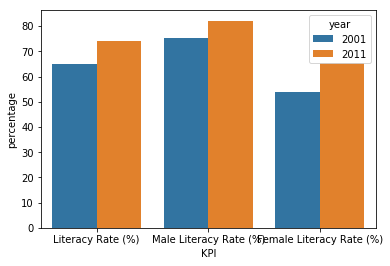

In [87]:
sns.barplot(x = "KPI", y = "percentage", hue = "year", data = df_melted);